Project 2: Data Representations and Clustering
==============================================

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/UCLA/Grad/EE219 Project 2/')

# Clustering on Text Data

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

class_1_cats = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
class_2_cats = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

X_1, _ = fetch_20newsgroups(subset='all', categories=class_1_cats, shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)
X_2, _ = fetch_20newsgroups(subset='all', categories=class_2_cats, shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)

X_full = X_1 + X_2
y_full = np.concatenate((np.ones(len(X_1)), np.zeros(len(X_2))))

print(len(X_full))
print(y_full.shape)

7882
(7882,)


## Clustering with Sparse Text Representations

In [ ]:
import re
def clean(text):
    # removes many HTML artefacts from the crawler's output
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r'http\S+', '', text, flags=re.MULTILINE) # remove URLs
    texter = re.sub(r'\S+\.com', '', texter.lower(), flags=re.MULTILINE) # remove remaining URLs ending in .com
    texter = re.sub(r'www\S+', '', texter, flags=re.MULTILINE) # remove remaining URLs with www
    texter = re.sub(r'\S+@\S+', '', texter) # remove emails
    texter = re.sub(r"<br />", " ", texter)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub('\t', ' ', texter) # remove \t
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    texter = re.sub(r'\d+s', '', texter) # remove years like "1970s"
    texter = re.sub(r'(?<=[a-zA-Z])\-(?=[a-zA-Z])', ' ', texter) # remove hyphens within words
    texter = re.sub(r'(?<=[a-zA-Z])\'(?=[a-zA-Z])', '', texter) # remove apostrophes within words
    texter = re.sub(r'(?<=[a-zA-Z])\.(?=[a-zA-Z])', ' ', texter) # remove periods within words
    texter = re.sub(r'(?<=[a-zA-Z])/(?=[a-zA-Z])', ' ', texter) # remove slashes within words
    texter = re.sub(r'\b[^a-z0-9 ]*\d+[^a-z0-9 ]*\b', '', texter) # remove all number terms
    texter = re.sub(r'\b[^a-z0-9 ]*\d+\.\d+[^a-z0-9 ]*\b', '', texter)
    texter = re.sub(r'\ba\d+', '', texter)
    texter = re.sub(r'\d+(a|p)m', '', texter)
    texter = re.sub(r'\d+th', '', texter)
    texter = re.sub(r'\d+st', '', texter)
    texter = re.sub(r'\d+nd', '', texter)
    texter = re.sub(r'\d+rd', '', texter)
    texter = re.sub(r'_+', ' ', texter) # remove underscores
    texter = re.sub(r'[^\w\s]', ' ', texter) # remove all remaining punctuation
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(' +', ' ', texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

### Generate sparse TF-IDF representations

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_clean = [clean(doc) for doc in X_full]

vectorizer = CountVectorizer(stop_words=combined_stopwords, min_df=3, max_df=0.7)
X_counts = vectorizer.fit_transform(X_clean)

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(7882, 19159)


In [ ]:
print(vectorizer.get_feature_names_out()[1000:1100])

['ads' 'adsorbent' 'adsorption' 'adults' 'adv' 'advance' 'advanced'
 'advancement' 'advances' 'advancing' 'advantage' 'advantageous'
 'advantages' 'adverse' 'advert' 'advertise' 'advertised' 'advertisement'
 'advertisements' 'advertising' 'advice' 'advise' 'advised' 'advising'
 'advisor' 'advocacy' 'advocate' 'advocates' 'ae' 'aerial' 'aero'
 'aerodynamics' 'aerostich' 'aerostitch' 'aesthetically' 'af' 'afc'
 'affair' 'affairs' 'affect' 'affected' 'affecting' 'affects' 'affiliate'
 'affiliated' 'affiliates' 'affiliation' 'affiliations' 'affinity'
 'afford' 'affordable' 'afforementioned' 'afm' 'afraid' 'africa' 'african'
 'afterall' 'aftermarket' 'afternoon' 'afterward' 'ag' 'age' 'aged'
 'agencies' 'agency' 'agencys' 'agent' 'agents' 'ages' 'aggravation'
 'aggressive' 'aggressively' 'agian' 'aging' 'ago' 'agree' 'agreed'
 'agreeing' 'agreement' 'agreements' 'agrees' 'agressive' 'agricultural'
 'ah' 'aha' 'ahead' 'ahem' 'ahf' 'ahh' 'ahhh' 'ahl' 'ahola' 'ahold'
 'ahrens' 'ahrma' 'ahve' '

**Question 1**: The TF-IDF matrix has shape (7882, 19159).

### Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred = kmeans.fit_predict(X_tfidf)
y_pred.shape

(7882,)

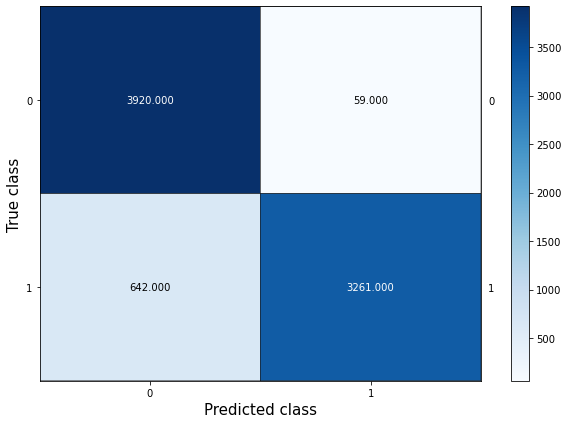

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from plotmat import plot_mat

mat = contingency_matrix(y_full, y_pred)
plot_mat(mat, size=(8,6), xlabel='Predicted class', ylabel='True class')

**Question 2**: The contingency table is displayed above. A contingency matrix does not have to be square-shaped. The table is square-shaped only if the number of clusters matches the number of true classes, such as in this case, but in general a clustering algorithm may find a different number of clusters.

In [ ]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure, adjusted_rand_score, adjusted_mutual_info_score

def cluster_metrics(labels_true, labels_pred, print_metrics=False):
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels_true, labels_pred)
    ari = adjusted_rand_score(labels_true, labels_pred)
    ami = adjusted_mutual_info_score(labels_true, labels_pred)
    metrics_list = [homogeneity, completeness, v_measure, ari, ami]

    if print_metrics:
        print_cluster_metrics(metrics_list)
    else:
        return metrics_list

def print_cluster_metrics(metrics_list):
    print('Homogeneity: {}'.format(metrics_list[0]))
    print('Completeness: {}'.format(metrics_list[1]))
    print('V-Measure: {}'.format(metrics_list[2]))
    print('Adjusted Rand Index: {}'.format(metrics_list[3]))
    print('Adjusted mutual info: {}'.format(metrics_list[4]))

In [ ]:
cluster_metrics(y_full, y_pred, print_metrics=True)

Homogeneity: 0.6064971961625802
Completeness: 0.6175638141067112
V-Measure: 0.6119804790200591
Adjusted Rand Index: 0.6758509044067856
Adjusted mutual info: 0.6119446343007903


**Question 3**: The homogeneity, completeness, V-Measure, adjusted Rand Index, and adjusted mutual information score for K-means clustering are reported above.

## Clustering with Dense Text Representations


### Generate dense representations for better K-means clustering

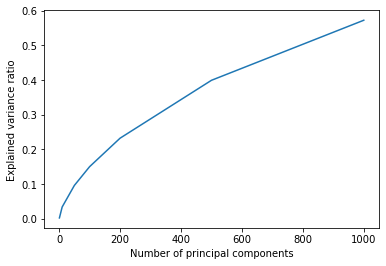

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

r_list = [1, 10, 50, 100, 200, 500, 1000]
var_list = []

for r in r_list:
    lsi = TruncatedSVD(n_components=r, n_iter=100)
    lsi.fit(X_tfidf)
    var_list.append(lsi.explained_variance_ratio_.sum())

plt.figure()
plt.plot(r_list, var_list)
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.show()

**Question 4**: The explained variance plot is above.

In [ ]:
# truncated SVD

r_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]
svd_metrics_list = []

lsi = TruncatedSVD(n_components=1000, n_iter=100)
X_svd = lsi.fit_transform(X_tfidf)

for r in r_list:
    X_svd_r = X_svd[:,:r]
    kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=1000, random_state=0)
    y_pred = kmeans.fit_predict(X_svd_r)
    svd_metrics_list.append(cluster_metrics(y_full, y_pred))

In [ ]:
svd_metrics_arr = np.asarray(svd_metrics_list)
fig, axs = plt.subplots(1,5,figsize=(25,5))

metrics_label = ['Homogeneity', 'Completeness', 'V-Measure', 'Adjusted Rand Index', 'Adjusted mutual info']
for i in np.arange(5):
    axs[i].plot(r_list, svd_metrics_arr[:,i])
    axs[i].set_ylabel(metrics_label[i])
fig.text(0.5, 0.04, 'Dimensionality of reduced data', ha='center')
plt.show()

In [ ]:
# highest SVD metrics
print_cluster_metrics(svd_metrics_list[3])

Homogeneity: 0.5093691952608577
Completeness: 0.5350194470986603
V-Measure: 0.5218793352671123
Adjusted Rand Index: 0.5421709418748613
Adjusted mutual info: 0.5218344872389079


In [ ]:
# NMF
from sklearn.decomposition import NMF

r_list = [1, 2, 3, 5, 10, 20, 50, 100, 300]
nmf_metrics_list = []

for r in r_list:
    nmf_model = NMF(n_components=r, init='random', max_iter=500, random_state=42)
    X_nmf = nmf_model.fit_transform(X_tfidf)
    kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=1000, random_state=0)
    y_pred = kmeans.fit_predict(X_nmf)
    nmf_metrics_list.append(cluster_metrics(y_full, y_pred))

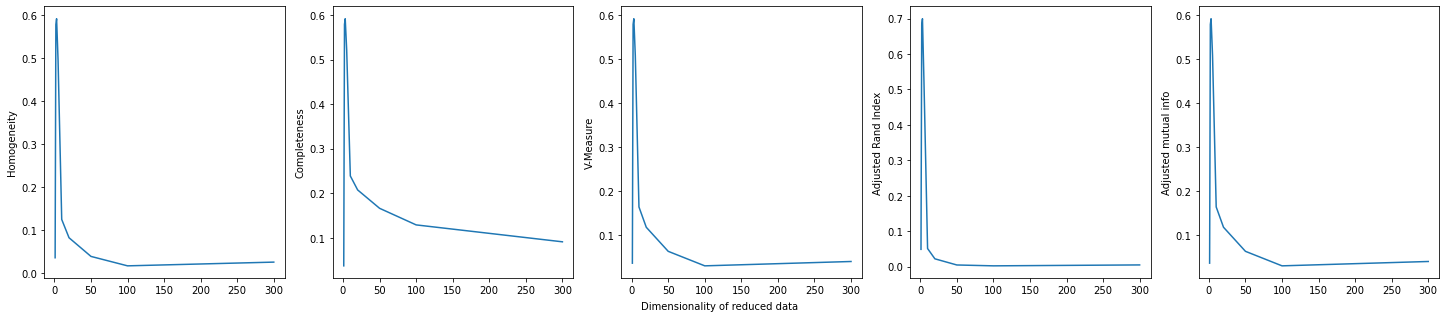

In [ ]:
nmf_metrics_arr = np.asarray(nmf_metrics_list)
fig, axs = plt.subplots(1,5,figsize=(25,5))

metrics_label = ['Homogeneity', 'Completeness', 'V-Measure', 'Adjusted Rand Index', 'Adjusted mutual info']
for i in np.arange(5):
    axs[i].plot(r_list, nmf_metrics_arr[:,i])
    axs[i].set_ylabel(metrics_label[i])
fig.text(0.5, 0.04, 'Dimensionality of reduced data', ha='center')
plt.show()

In [ ]:
# highest metrics
print_cluster_metrics(nmf_metrics_list[1])

Homogeneity: 0.5782237421214756
Completeness: 0.5789623090479784
V-Measure: 0.5785927898918131
Adjusted Rand Index: 0.6821241912434625
Adjusted mutual info: 0.5785541853005189


**Question 5**: The plots of evluation metrics v.s. $r$ for both SVD and NMF are shown above. A good choice of $r$ for SVM is 50, since it achieves the highest scores across all five metrics. Similarly, a good choice of $r$ for NMF is 2 since it achieves the highest scores.

**Question 6**: The curves are non-monotonic because although higher $r$ values preserve more information about the data, K-means clustering does not perform well with higher dimensional data due to the curse of dimensionality.

**Question 7**: These measures are on average worse than those computed in Q3. In Q3, all measures were greater than 0.6, but the scores for SVD and NMF are generally below 0.6.

### Visualize the clusters

In [ ]:
# create dense representations with optimal r
svd_r = 50
lsi = TruncatedSVD(n_components=svd_r, n_iter=100)
X_svd = lsi.fit_transform(X_tfidf)
kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred_svd = kmeans.fit_predict(X_svd)

nmf_r = 2
nmf_model = NMF(n_components=nmf_r, init='random', max_iter=500, random_state=42)
X_nmf = nmf_model.fit_transform(X_tfidf)
kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred_nmf = kmeans.fit_predict(X_nmf)

# project to 2D
lsi = TruncatedSVD(n_components=2, n_iter=100)
X_svd_vis = lsi.fit_transform(X_svd)
# X_nmf_vis = lsi.fit_transform(X_nmf)
X_nmf_vis = X_nmf # if nmf_r=2

In [ ]:
# SVD visualization
plt.scatter(X_svd_vis[:,0], X_svd_vis[:,1], c=y_pred_svd)
plt.title('Clustering visualization for SVD')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()

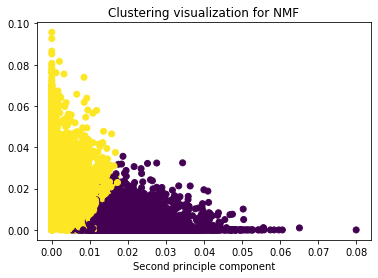

In [ ]:
# NMF visualization
plt.scatter(X_nmf_vis[:,0], X_nmf_vis[:,1], c=y_pred_svd)
plt.title('Clustering visualization for NMF')
plt.xlabel('First principle component')
plt.xlabel('Second principle component')
plt.show()

**Question 8**: The visualizations for K-means clustering with SVD and with NMF are shown above.

**Question 9**: In 2D, the two classes do not appear to be to grouped together in separate isotropically shaped clusters. This means that K-means may perform poorly, since it assumes classes are related by their L2 norm. However, the 2D visualization suggests that the classes fall on either side of a boundary, and each class does not have a spherical distribution, so the data is not ideal for K-means clustering.

### Clustering of the entire 20 classes

In [ ]:
X, y = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)
print(len(X))
print(y.shape)

18846
(18846,)


In [ ]:
# construct TF-IDF matrix

X_clean = [clean(doc) for doc in X]

vectorizer = CountVectorizer(stop_words=combined_stopwords, min_df=3, max_df=0.7)
X_counts = vectorizer.fit_transform(X_clean)

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(18846, 37749)


In [ ]:
# reduce dimensionality with SVD

svd_r = 50
lsi = TruncatedSVD(n_components=svd_r, n_iter=100)
X_svd = lsi.fit_transform(X_tfidf)
kmeans = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred = kmeans.fit_predict(X_svd)

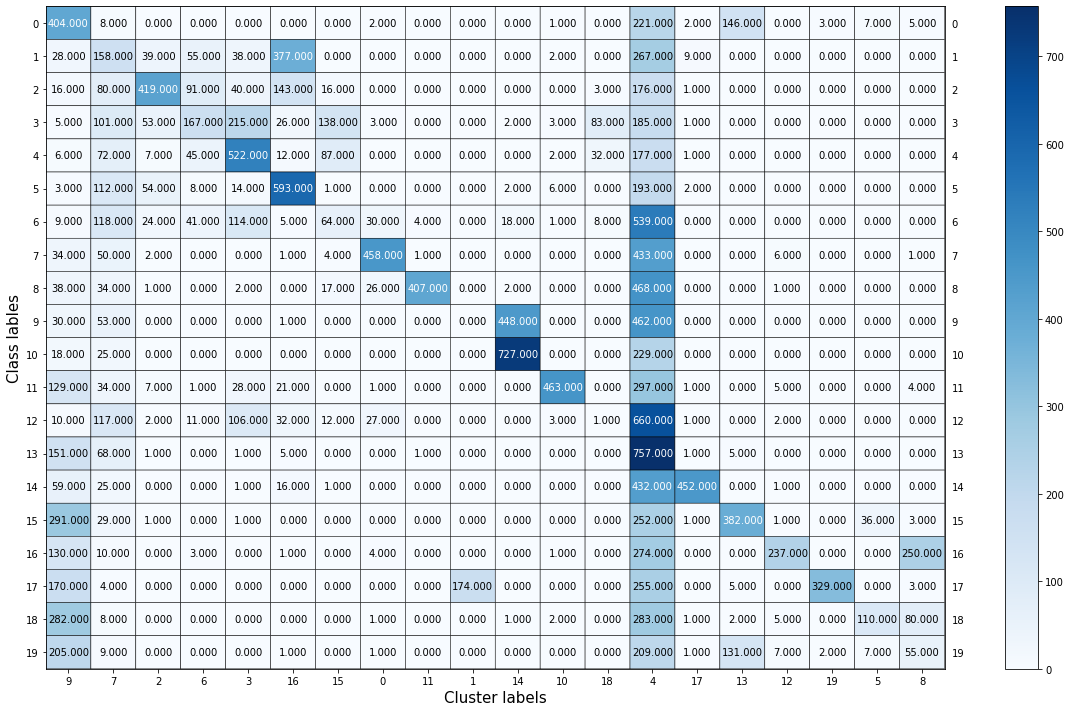

In [ ]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:,np.newaxis], cols], xticklabels=cols, yticklabels=rows, xlabel="Cluster labels", ylabel="Class lables", size=(15,10))

In [ ]:
cluster_metrics(y, y_pred, print_metrics=True)

Homogeneity: 0.36296085404444073
Completeness: 0.45521812997904976
V-Measure: 0.40388805985015463
Adjusted Rand Index: 0.10263622010282712
Adjusted mutual info: 0.4017336208538667


**Question 10**: The contingency matrix and clustering metrics are above.

### UMAP

In [ ]:
import umap

n_components_list = [5, 20, 200]
metrics_list = ['euclidean', 'cosine']
eval_metrics_list = []

for metric in metrics_list:
    for n_components in n_components_list:
        reducer = umap.UMAP(n_components=n_components, metric=metric)
        embedding = reducer.fit_transform(X_tfidf)
        
        kmeans = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)
        y_pred = kmeans.fit_predict(embedding)
        eval_metrics_list.append(cluster_metrics(y, y_pred))

In [ ]:
# evaluation metrics for "euclidean" metric

euc_metrics = np.asarray(eval_metrics_list)[:len(eval_metrics_list)//2]
print(euc_metrics)

[[0.0123693  0.01272072 0.01254255 0.00241198 0.00928209]
 [0.01508113 0.01598591 0.01552034 0.00281718 0.01222763]
 [0.01295839 0.01399827 0.01345827 0.00293747 0.0101525 ]]


In [ ]:
# optimal n_components for "euclidean" metric

best_idx = 1 # row with highest scores
best_n_components = n_components_list[best_idx]

print("Best n_components: {}".format(best_n_components))
print_cluster_metrics(euc_metrics[best_idx,:])

Best n_components: 20
Homogeneity: 0.015081125127851631
Completeness: 0.015985906533564274
V-Measure: 0.015520340619747261
Adjusted Rand Index: 0.002817176697411078
Adjusted mutual info: 0.012227631048587704


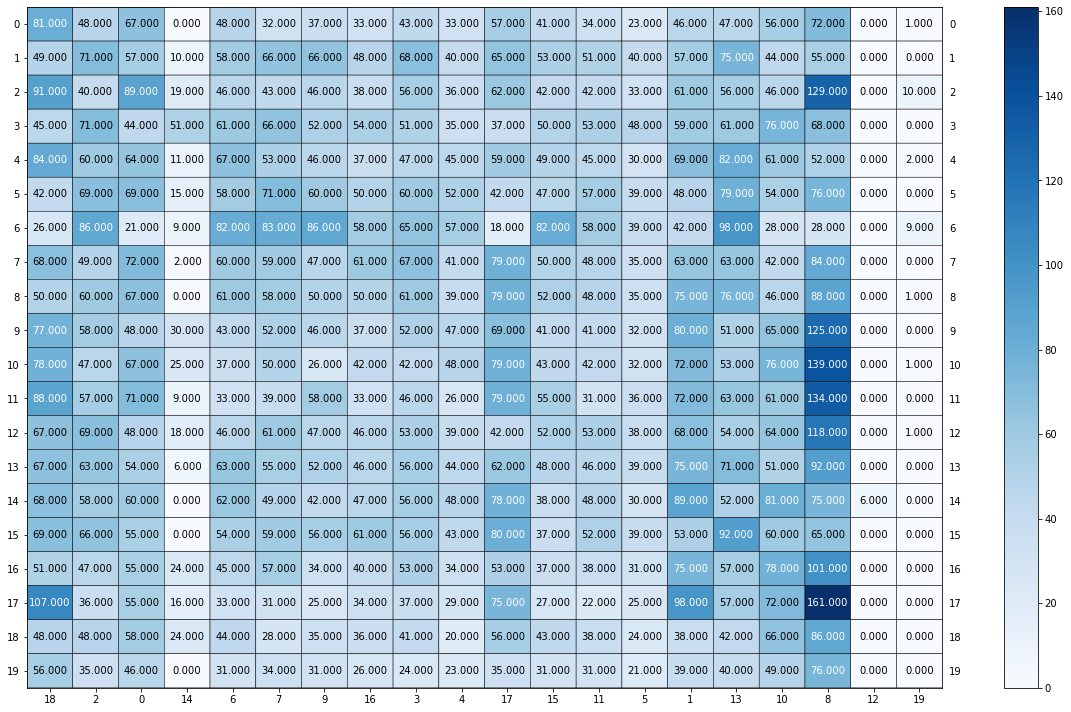

In [ ]:
# contingency matrix for "euclidean" metric

reducer = umap.UMAP(n_components=best_n_components, metric='euclidean')
X_euc = reducer.fit_transform(X_tfidf)
kmeans = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred = kmeans.fit_predict(X_euc)

cm = confusion_matrix(y, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:,np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,10))

In [ ]:
# evaluation metrics for "cosine" metric

cos_metrics = np.asarray(eval_metrics_list)[len(eval_metrics_list)//2:]
print(cos_metrics)

[[0.54778524 0.58524671 0.56589668 0.41219631 0.56443417]
 [0.55114379 0.57130628 0.56104395 0.42557642 0.55958927]
 [0.55518325 0.59434762 0.57409827 0.42617291 0.57266184]]


In [ ]:
# optimal n_components for "cosine" metric

best_idx = 2 # row with highest scores
best_n_components = n_components_list[best_idx]

print("Best n_components: {}".format(best_n_components))
print_cluster_metrics(cos_metrics[best_idx,:])

Best n_components: 200
Homogeneity: 0.5551832460672587
Completeness: 0.5943476165966497
V-Measure: 0.5740982687664321
Adjusted Rand Index: 0.42617290848912814
Adjusted mutual info: 0.5726618438174442


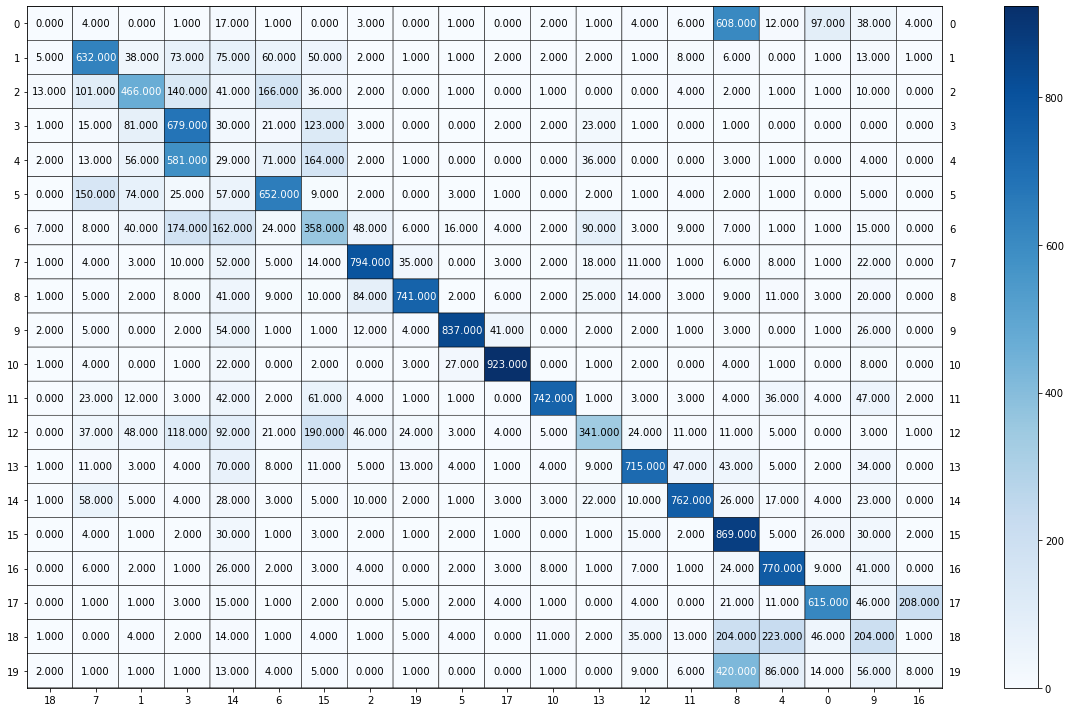

In [ ]:
# contingency matrix for "cosine" metric

reducer = umap.UMAP(n_components=best_n_components, metric='cosine')
X_cos = reducer.fit_transform(X_tfidf)
kmeans = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)
y_pred = kmeans.fit_predict(X_cos)

cm = confusion_matrix(y, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:,np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,10))

**Question 11**: A good n_components choice for "euclidean" metrics is 20, which achieved the highest homogeneity, completeness, V-measure, and adjusted mutual info. A good n_components choice for "cosine" metric is 200 since it achieved the highest scores for all five clustering evaluation metrics. The contingency matrix and clustering metrics for "euclidean" and "cosine" distance metrics are above.

**Question 12**: The contingency matrix for "euclidean" shows poor performance, because there are many high values off the main diagonal and some low values on the main diagonal, so K-means clustering is clustering many data points incorrectly. In contrast, the contingency matrix for "cosine" shows a clear main diagonal with many high values and mostly low values everywhere else, so K-means clustering is generally clustering the data correctly, and making mistakes with only some classes, such as predicting class 8 for class 0.

**Question 13**: With K-means clustering, the sparse representation without any dimensionality reduction is expected give the worst performance. This is not apparent in the results for SVD and NMF because the optimal parameter values for these two dimensionality reduction techniques were not included in the grid tested. For UMAP, the "cosine" metric achieves much higher performance than the "euclidean" metric as expected, as the relative orientation of two TF-IDF vectors will give a better idea of document similarity than Euclidean distance when documents are of very different lengths. On the task of clustering 2 classes, SVD with optimized parameters performed better than NMF with optimized parameters, as given in Q5 and Q6. However, SVD performed very poorly on the clustering of all 20 classes, and NMF might be expected to achieve similar or slightly lower performance based on the 2-classes case. Due to this, we can expect that UMAP with the "cosine" metric and n_components=200 as found in Q11 would be the best approach for K-meanas clustering on the 20-class dataset.

## Clustering Algorithms that do not rely on Gaussian Distribution

In [ ]:
# reduce dimensionality with UMAP

reducer = umap.UMAP(n_components=200, metric='cosine')
embedding = reducer.fit_transform(X_tfidf)

### Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# 'ward' linkage
print("'ward' linkage")
clustering = AgglomerativeClustering(n_clusters=20, linkage='ward')
y_pred = clustering.fit_predict(embedding)
cluster_metrics(y, y_pred, print_metrics=True)

# 'single' linkage
print("\n'single' linkage")
clustering = AgglomerativeClustering(n_clusters=20, linkage='single')
y_pred = clustering.fit_predict(embedding)
cluster_metrics(y, y_pred, print_metrics=True)

'ward' linkage
Homogeneity: 0.5388510402611808
Completeness: 0.5897496105725395
V-Measure: 0.5631525923999482
Adjusted Rand Index: 0.39248082101444015
Adjusted mutual info: 0.56167108634169

'single' linkage
Homogeneity: 0.006728507631571251
Completeness: 0.24722829390757953
V-Measure: 0.013100475767655642
Adjusted Rand Index: -3.8525914549030366e-05
Adjusted mutual info: 0.007969140043697087


**Question 14**: The clustering evaluation metrics for agglomerative clustering are above.

## DBSCAN and HDBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5)
y_pred = clustering.fit_predict(embedding)
cluster_metrics(y, y_pred, print_metrics=True)

Homogeneity: 0.10664332055848488
Completeness: 0.6066197996373831
V-Measure: 0.1813971532191048
Adjusted Rand Index: 0.02079672188184964
Adjusted mutual info: 0.17508870769716642


In [ ]:
import hdbscan

min_cluster_size_list = [100, 200]

for min_cluster_size in min_cluster_size_list:
    print("min_cluster_size: {}".format(min_cluster_size))
    clustering = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    y_pred = clustering.fit_predict(embedding)
    cluster_metrics(y, y_pred, print_metrics=True)

min_cluster_size: 100
Homogeneity: 0.4014309304392313
Completeness: 0.5865698989371588
V-Measure: 0.4766540539173689
Adjusted Rand Index: 0.1740696500100282
Adjusted mutual info: 0.4752759395436289
min_cluster_size: 200
Homogeneity: 0.3957547408386688
Completeness: 0.59453010371125
V-Measure: 0.4751927860149578
Adjusted Rand Index: 0.18374253085956102
Adjusted mutual info: 0.4741224176126034


**Question 15**: The clustering evaluation metrics for DBSCAN with eps=0.5 and HDBSCAN with min_cluster_size = [100,200] are reported above. HDBSCAN with min_cluster_size=100 performs better than HDBSCAN with min_cluster_size=200 in all evaluation metrics except Adjusted Rand Index, and both HDBSCAN methods perform better than DBSCAN except in completeness.

In [ ]:
clustering = hdbscan.HDBSCAN(min_cluster_size=100)
y_pred = clustering.fit_predict(embedding)

cm = confusion_matrix(y, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:,np.newaxis], cols], xticklabels=cols, yticklabels=rows, xlabel="Cluster label", ylabel="Class label", size=(15,10))

In [ ]:
# noise cluster
clustering.labels_.min()

-1

In [ ]:
# number of clusters
clustering.labels_.max()

12

**Question 16**: The best clustering model from Q15 is HDBSCAN with min_cluster_size=100, and the contingency matrix is shown above. The model found 13 clusters. A "-1" label (cluster label 0 in the contingency matrix) means that the data point was labeled as noise and not assigned to any cluster. The contingency matrix shows that classes 2 through 7 were clustered together along with many data points in class 13. Similarly, classes 8 and 9 were clustered together, and classes 10 and 11 were clustered together. Some predicted classes have all zeros since the model did not predict as many clusters as there are classes. The metrics above were computed with the noise cluster included, as removing the cluster would give a false sense of performance.

In [ ]:
import scipy

svd_r = [5,20,200]
nmf_r = [5,20,200]
umap_n_components = [5,20,200]

k_means_k = [10,20,50]
agg_n_clusters = [20]
db_eps = [0.5,5]
hdb_size = [100,200]

eval_metrics = []

for i in range(80):
    # dimensionality reduction
    if i<8: # none
        print("Dimensionality reduction: none")
        X_red = X_tfidf
    elif i<32: # svd
        print("Dimensionality reduction: SVD, r={}".format(svd_r[(i//8)-1]))
        X_red = TruncatedSVD(n_components=svd_r[(i//8)-1], n_iter=100).fit_transform(X_tfidf)
    elif i<56: # nmf
        print("Dimensionality reduction: NMF, r={}".format(nmf_r[(i//8)-4]))
        X_red = NMF(n_components=nmf_r[(i//8)-4], init='random', max_iter=500, random_state=42).fit_transform(X_tfidf)
    else: # umap
        print("Dimensionality reduction: UMAP, n_components={}".format(umap_n_components[(i//8)-7]))
        X_red = umap.UMAP(n_components=umap_n_components[(i//8)-7], metric='cosine').fit_transform(X_tfidf)
    # clustering
    if (i%8)<3: # k_means
        print("Clustering: K-means, k={}".format(k_means_k[i%8]))
        clustering = KMeans(n_clusters=k_means_k[i%8], init='random', n_init=30, max_iter=1000, random_state=0)
    elif (i%8)<4: # agglomerative clustering
        print("Clustering: Agglomerative clustering, n_clusters={}".format(agg_n_clusters[0]))
        if scipy.sparse.issparse(X_red): continue # skip for sparse matrices
        else:
            clustering = AgglomerativeClustering(n_clusters=agg_n_clusters[0], linkage='ward')
    elif (i%8)<6: # DBSCAN
        print("Clustering: DBSCAN, eps={}".format(db_eps[(i%8)-4]))
        clustering = DBSCAN(eps=db_eps[(i%8)-4])
    else:
        print("Clustering: HDBSCAN, min_cluster_size={}".format(hdb_size[(i%8)-6]))
        clustering = hdbscan.HDBSCAN(min_cluster_size=hdb_size[(i%8)-6])

    y_pred = clustering.fit_predict(X_red)
    eval_metrics.append(cluster_metrics(y, y_pred))

Dimensionality reduction: none
Clustering: K-means, k=10
Dimensionality reduction: none
Clustering: K-means, k=20
Dimensionality reduction: none
Clustering: K-means, k=50
Dimensionality reduction: none
Clustering: Agglomerative clustering, n_clusters=20
Dimensionality reduction: none
Clustering: DBSCAN, eps=0.5
Dimensionality reduction: none
Clustering: DBSCAN, eps=5
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=100
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=200
Dimensionality reduction: SVD, r=5
Clustering: K-means, k=10
Dimensionality reduction: SVD, r=5
Clustering: K-means, k=20
Dimensionality reduction: SVD, r=5
Clustering: K-means, k=50
Dimensionality reduction: SVD, r=5
Clustering: Agglomerative clustering, n_clusters=20
Dimensionality reduction: SVD, r=5
Clustering: DBSCAN, eps=0.5
Dimensionality reduction: SVD, r=5
Clustering: DBSCAN, eps=5
Dimensionality reduction: SVD, r=5
Clustering: HDBSCAN, min_cluster_size=100
Dimensionalit

In [ ]:
rand_scores = np.asarray(eval_metrics)[:,3]
best_idx = np.argmax(rand_scores)
print("Best iteration: {}".format(best_idx))

print_cluster_metrics(eval_metrics[best_idx])

Best iteration: 65
Homogeneity: 0.5623993401014538
Completeness: 0.5813445425587711
V-Measure: 0.5717150352685412
Adjusted Rand Index: 0.43795409580259353
Adjusted mutual info: 0.5702974512800268


**Question 17**: Comparing the adjusted Rand Index scores, the best combination of dimensionality reduction and clustering was UMAP with n_components=20 and K-means clustering with k=20. The clustering evaluation metrics for this method are reported above.

# Bonus Methods

## Clustering with only nouns

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tag import pos_tag

morphy_tag = {'NN':'n', 'JJ':'a',
              'VB':'v', 'RB':'r'}
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    return morphy_tag.get(penntag[:2], 'n')

def get_nouns(text):
    w_tokenizer = WhitespaceTokenizer()
    return ' '.join([word for word, tag in pos_tag(w_tokenizer.tokenize(text)) if penn2morphy(tag)=='n'])

In [ ]:
X, y = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)

X_clean = [get_nouns(clean(doc)) for doc in X]

vectorizer = CountVectorizer(stop_words=combined_stopwords, min_df=3, max_df=0.7)
X_counts = vectorizer.fit_transform(X_clean)

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(18846, 25866)


In [ ]:
X_red = umap.UMAP(n_components=20, metric='cosine').fit_transform(X_tfidf)
clustering = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)

y_pred = clustering.fit_predict(X_red)
cluster_metrics(y, y_pred, print_metrics=True)

Homogeneity: 0.5069121068148463
Completeness: 0.5464340867216564
V-Measure: 0.5259316563447045
Adjusted Rand Index: 0.3692109630608751
Adjusted mutual info: 0.5243184923199052


## Standard scaler

In [ ]:
X, y = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)
X_clean = [clean(doc) for doc in X]

vectorizer = CountVectorizer(stop_words=combined_stopwords, min_df=3, max_df=0.7)
X_counts = vectorizer.fit_transform(X_clean)

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(18846, 37749)


In [ ]:
from sklearn.preprocessing import StandardScaler

X_red = umap.UMAP(n_components=20, metric='cosine').fit_transform(X_tfidf)
X_scaled = StandardScaler().fit_transform(X_red)
clustering = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)

y_pred = clustering.fit_predict(X_scaled)
cluster_metrics(y, y_pred, print_metrics=True)

Homogeneity: 0.5466263500764392
Completeness: 0.5747580419343591
V-Measure: 0.5603393321290927
Adjusted Rand Index: 0.40002849379888433
Adjusted mutual info: 0.5588710505129801


## Nonlinear transformation

In [ ]:
X, y = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=("headers", "footers"), return_X_y=True)
X_clean = [clean(doc) for doc in X]

vectorizer = CountVectorizer(stop_words=combined_stopwords, min_df=3, max_df=0.7)
X_counts = vectorizer.fit_transform(X_clean)

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(18846, 37749)


In [ ]:
X_red = umap.UMAP(n_components=20, metric='cosine').fit_transform(X_tfidf)
X_scaled = StandardScaler().fit_transform(X_red)
X_trans = np.log(X_scaled-np.min(X_scaled)+0.01)
clustering = KMeans(n_clusters=20, init='random', n_init=30, max_iter=1000, random_state=0)

y_pred = clustering.fit_predict(X_trans)
cluster_metrics(y, y_pred, print_metrics=True)

Homogeneity: 0.5457038378862168
Completeness: 0.5814504194345959
V-Measure: 0.563010294935521
Adjusted Rand Index: 0.41393295116712125
Adjusted mutual info: 0.5615490153162919


**Question 18**: Another method we tested was to keep only the nouns in the documents, using pos_tag() from NLTK, if the nouns in the documents might be more informative of class than the full vocabulary. The same optimal combination from Q17 of UMAP (n_components=20) and K-means clustering (k=20) was performed on this TF-IDF matrix, but the performance was worse than in Q17. We also tested the same optimal method as in Q17 but scaling the reduced matrix to have zero mean and unit variance, so that any UMAP features with very large or very small magnitudes would be normalized. This also performed worse that the optimal method found in Q17. A final additional method we tested was performing a nonlinear transformation on the normalized reduced matrix. We took the log() of the scaled matrix, with a shift by the minimum value of the scaled matrix and a slight offset of 0.01 to avoid taking log(0). This achieved better performance than the Q17 method only on the completeness score, and it scored worse on the other metrics.

#  Deep Learning and Clustering of Image Data

**Question 19**: The VGG network was pre-trained on the ImageNet dataset, which includes over one million training images spanning 1000 object classes, so it is expected that the network has learned to extract images features that are expressive for image classification tasks in general. Since ImageNet dataset also contains images of flowers, the features generated by VGG network should also be able to classify and cluster images of flowers.
<!-- The problem in this part is to cluster images of flowers, which may be a similar enough task to classifying ImageNet images that transfer learning can take place, and the useful features learned from ImageNet can be used to cluster other images. -->

**Question 20**: All input images are also first transformed by resizing and cropping to be the same size, converted to a tensor, and normalized in their mean and standard deviation. The helper code first loads the pre-trained VGG network, extracts the feature layers and average pooling layer from the VGG network, flattens the obtained feature maps into a one-dimensional vector, then passes it through the final fully-connected layer to get final features.

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

In [ ]:
print(f_all.shape, y_all.shape)

(3670, 4096) (3670,)


**Question 21**: The original image sizes vary. For example, the first image is has dimensions 320 by 263, which is 84160 pixels, and the size of the second image is 500 by 313, with 156500 pixels. After the transformation, they are resized and cropped to have dimension 224 by 224, for a total of 50176 pixels. The VGG network extracts 4096 features per image, since the resulting feature matrix has 4096 columns.

**Question 22**: The extracted features are dense. In contrast, the TF-IDF matrix is sparse, which made K-means clustering perform poorly due to the curse of dimensionality. With a dense matrix, K-means might perform better on the VGG features.

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(f_all)

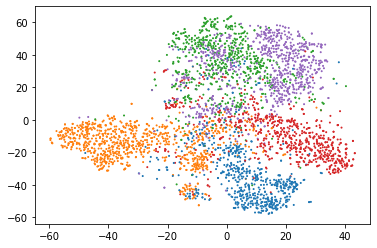

In [ ]:
import seaborn as sns

plt.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    c=[sns.color_palette()[int(x)] for x in y_all], s=1)
plt.show()

**Question 23**: The above plot shows the visualization of the five classes in 2D using t-SNE. The red, blue, and orange data appear to form mostly distinct clusters, though they overlap somewhat in the middle of the plot. The green points and purple data points overlap significantly, so they may be difficult to separate into two clusters, and confusion between these two classes may decrease the homogeneity score.

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        # X = torch.tensor(X, dtype=torch.float32)
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        # X = torch.tensor(X, dtype=torch.float32)
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

In [ ]:
import scipy

svd_r_2 = 50
umap_n_components_2 = 50
autoencoder_num_features = 50

k_means_k_2 = 5
agg_n_clusters_2 = 5
hdb_size_2 = [100,200]
min_cluster_size = [50,100,200]
min_samples = [5,10]

eval_metrics = []
C = 1+1+6

f_svd = TruncatedSVD(n_components=svd_r_2, n_iter=100).fit_transform(f_all)
f_umap = umap.UMAP(n_components=umap_n_components_2, metric='cosine').fit_transform(f_all)
f_auto = Autoencoder(autoencoder_num_features).fit_transform(f_all)

for i in range(4*C):
    # dimensionality reduction
    if i<C*1: # none
        print("Dimensionality reduction: none")
        X_red = f_all
    elif i<C*2: # svd
        print("Dimensionality reduction: SVD, r={}".format(svd_r_2))
        X_red = f_svd
    elif i<C*3: # umap
        print("Dimensionality reduction: UMAP, n_components={}".format(umap_n_components_2))
        X_red = f_umap
    else: # Autoencoder
        print("Dimensionality reduction: Autoencoder, num_features={}".format(autoencoder_num_features))
        X_red = f_auto
        
    # clustering
    if (i%C)<1: # k_means
        print("Clustering: K-means, k={}".format(k_means_k_2))
        clustering = KMeans(n_clusters=k_means_k_2, init='random', n_init=30, max_iter=1000, random_state=0)
    elif (i%C)<2: # agglomerative clustering
        print("Clustering: Agglomerative clustering, n_clusters={}".format(agg_n_clusters_2))
        clustering = AgglomerativeClustering(n_clusters=agg_n_clusters_2, linkage='ward')
    else: # HDBSCAN
        print("Clustering: HDBSCAN, min_cluster_size={}, min_samples={}".format(min_cluster_size[((i%C)-2)//2], min_samples[((i%C)-2)%2]))
        clustering = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size[((i%C)-2)//2], min_samples=min_samples[((i%C)-2)%2])

    y_pred = clustering.fit_predict(X_red)
    eval_metrics.append(cluster_metrics(y_all, y_pred))

100%|██████████| 100/100 [48:25<00:00, 29.05s/it]


Dimensionality reduction: none
Clustering: K-means, k=5
Dimensionality reduction: none
Clustering: Agglomerative clustering, n_clusters=5
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=50, min_samples=5
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=50, min_samples=10
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=100, min_samples=5
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=100, min_samples=10
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=200, min_samples=5
Dimensionality reduction: none
Clustering: HDBSCAN, min_cluster_size=200, min_samples=10
Dimensionality reduction: SVD, r=50
Clustering: K-means, k=5
Dimensionality reduction: SVD, r=50
Clustering: Agglomerative clustering, n_clusters=5
Dimensionality reduction: SVD, r=50
Clustering: HDBSCAN, min_cluster_size=50, min_samples=5
Dimensionality reduction: SVD, r=50
Clustering: HDBSCAN, min_cluster_size=50, min_samples=10


In [ ]:
rand_scores = np.asarray(eval_metrics)[:,3]
best_idx = np.argmax(rand_scores)
print("Best iteration: {}".format(best_idx))

print_cluster_metrics(eval_metrics[best_idx])

Best iteration: 16
Homogeneity: 0.5321560083229173
Completeness: 0.5442427594086336
V-Measure: 0.5381315235354837
Adjusted Rand Index: 0.467614366464596
Adjusted mutual info: 0.5374932250317


**Question 24**: For HDBSCAN, we tested a grid of min_cluster_size=[50,100,200] and a grid of min_samples=[5,10]. Similar values of min_cluster_size as in Q17 were chosen, and small values of min_samples were chosen, as a large min_samples could cause many data points to be clustered as noise. Comparing the Adjusted Rand Index scores, the best combination of dimensionality reduction and clustering was UMAP with n_components=50 and K-means clustering with k=5. The clustering evaluation metrics for this method are reported above.

In [ ]:
from sklearn.decomposition import NMF

class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, y_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')

        self.model.eval()
        
        criterion = nn.NLLLoss()

        dataset = TensorDataset(X_test)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

        y_pred_all = torch.zeros((0,1))
        for X_, in dataloader:
            X_ = X_.cuda()
            # ===================forward=====================
            output = self(X_)
            _, y_pred = output.data.cpu().topk(1)
            y_pred_all = torch.cat((y_pred_all, y_pred.data.cpu()), 0)

        return y_pred_all

    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        self.model.eval()
        
        criterion = nn.NLLLoss()

        dataset = TensorDataset(X_test, y_test)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

        accurary = torch.zeros((0,1))
        for (X_, y_) in dataloader:
            X_ = X_.cuda()
            # ===================forward=====================
            output = self(X_)
            _, y_pred = output.data.cpu().topk(1)
            accurary = torch.cat((accurary, y_pred.eq(y_.data.cpu().view(-1,1)).float()), 0)

        return torch.mean(accurary).numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.2)

In [ ]:
# train on the original VGG features

num_features = f_all.shape[1]
mlp = MLP(num_features=num_features).cuda()
mlp.train(X_train, y_train)

print("The test accuracy of the MLP classifier on the original VGG features is:", mlp.eval(X_test, y_test))
print("The clustering evaluation metrics of classification result are as follows:")
print_cluster_metrics(cluster_metrics(y_test.reshape(-1), mlp.predict(X_test).reshape(-1)))

100%|██████████| 100/100 [00:17<00:00,  5.67it/s]



The test accuracy of the MLP classifier on the original VGG features is: 0.9114441
The clustering evaluation metrics of classification result are as follows:
Homogeneity: 0.7701104268891534
Completeness: 0.77087402542413
V-Measure: 0.7704920369650111
Adjusted Rand Index: 0.7946575363482625
Adjusted mutual info: 0.7689066665463533


In [ ]:
# train on the reduced-dimension features

autoencoder_num_features = 50
X_red = Autoencoder(autoencoder_num_features).fit_transform(f_all)
X_train, X_test, y_train, y_test = train_test_split(X_red, y_all, test_size=0.2)
num_features = X_red.shape[1]
mlp = MLP(num_features=num_features).cuda()
mlp.train(X_train, y_train)

print("The test accuracy of the MLP classifier on the reduced-dimension features is:", mlp.eval(X_test, y_test))
print("The clustering evaluation metrics of classification result are as follows:")
print_cluster_metrics(cluster_metrics(y_test.reshape(-1), mlp.predict(X_test).reshape(-1)))

100%|██████████| 100/100 [00:07<00:00, 14.21it/s]


The test accuracy of the MLP classifier on the reduced-dimension features is: 0.886921
The clustering evaluation metrics of classification result are as follows:
Homogeneity: 0.7131485432329719
Completeness: 0.7142852920169536
V-Measure: 0.7137164649952975
Adjusted Rand Index: 0.7440867289065638
Adjusted mutual info: 0.711731533319758


**Question 25**: The test accuracy of the MLP classifer on the original VGG features was 0.9114. The input was reduced with an autoencoder to have 50 features, and the test accuracy on the reduced-dimension features was 0.8869. Similarly, the Adjusted Rand Index dropped from 0.7947 on the original VGG features to 0.7441 on the reduced-dimension features. The performance of the model suffers only slightly with the reduced-dimension representation, since dimensionality reduction has discarded some of the total information present in the VGG features.

Both these classifiers achieved significantly higher clustering evaluation scores than the optimal clustering method found from Q24. The optimal dimensionality reduction and clustering combination achieved an Adjusted Rand Index score of 0.4676, whereas the MLP classifier on the original VGG features and on the reduced-dimension features achieved 0.7947 and 0.7441, respectively. The other clustering metrics all follow this trend. This improved performance with the MLP classifier could be explained by the fact that the classification task is a supervised learning task, where the MLP model is provided the class labels during training. In contrast, clustering is unsupervised, so the performance of clustering methods may suffer due to not having access to the training data labels.